# Project	3:	Network	models

1 - OK 

2 - OK
                                           
3 - OK 

4 - OK

5 - Não sei o que ele quer dizer com fazer o PCA, não entendi o exercício.

Giovanna Zolin Pinheiro Hayasida - n: 9762848 

Luna Wagner Cunha - n: 9762831

In [1]:
#Pacotes 
import networkx as nx 
import matplotlib.pyplot as plt
from numpy  import *
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

from scipy.linalg import expm
from scipy.sparse import csr_matrix, issparse
from scipy import stats
import collections
from scipy.stats import moment

from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score
from community import community_louvain
from networkx.algorithms import community
from community import community_louvain
import networkx.algorithms.community as nx_comm

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Exercício 1

In [2]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [3]:
def calcula_medidas(G):
    # Number of nodes
    number_nodes = len(G)
    
    # Average Degree
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    md = mean(vk)
    
    # Second momment
    k2 = momment_of_degree_distribution(G,2)
    
    # Average Shortest Path
    if nx.is_connected(G) == True:
        l = nx.average_shortest_path_length(G)
    else:
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G_1=Gcc[0]
        print('We will use only the largest component')
        l = nx.average_shortest_path_length(G_1)
    
    # Average Clustering
    avc = nx.average_clustering(G)
    
    # Transitivity
    CC = (nx.transitivity(G)) 
    
    # Assortativity Coefficient
    r=nx.degree_assortativity_coefficient(G)

    results  = [number_nodes, md, k2, l, avc, CC, r]
    return results


In [4]:
measures = ['stats','nodes', 'average_degree', 'second_momment','av_shortest_path','av_cluster_coef','transitivity','assort_coef']

In [5]:
# Gerando redes ER
n_nodes_ER = []
av_degree_ER = []
sec_moment_ER = []
av_short_ER = []
av_clust_ER = []
tran_ER = []
ac_ER = []

for i in np.arange(1,31,1):
    N = 1000
    av_degree = 10
    p = av_degree/(N-1)
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    results_GER = calcula_medidas(GER)

    n_nodes_ER.append(results_GER[0])
    av_degree_ER.append(results_GER[1])
    sec_moment_ER.append(results_GER[2])
    av_short_ER.append(results_GER[3])
    av_clust_ER.append(results_GER[4])
    tran_ER.append(results_GER[5])
    ac_ER.append(results_GER[6])
    
    
means_GER = pd.Series({measures[0]: 'means_GER',measures[1]:np.mean(n_nodes_ER),measures[2]:np.mean(av_degree_ER),\
                       measures[3]:np.mean(sec_moment_ER),measures[4]:np.mean(av_short_ER), measures[5]:np.mean(av_clust_ER),
                       measures[6]:np.mean(tran_ER),measures[7]:np.mean(ac_ER)})

std_GER = pd.Series({measures[0]: 'std_GER',measures[1]:np.std(n_nodes_ER),measures[2]:np.std(av_degree_ER),\
                     measures[3]:np.std(sec_moment_ER),measures[4]:np.std(av_short_ER), measures[5]:np.std(av_clust_ER),\
                     measures[6]:np.std(tran_ER),measures[7]:np.std(ac_ER)})
    
print(means_GER)
print(std_GER)

We will use only the largest component
stats                means_GER
nodes                     1000
average_degree         9.99267
second_momment         109.745
av_shortest_path       3.25791
av_cluster_coef      0.0100226
transitivity          0.010068
assort_coef        -0.00207394
dtype: object
stats                   std_GER
nodes                         0
average_degree         0.126566
second_momment          2.71485
av_shortest_path      0.0165101
av_cluster_coef      0.00100463
transitivity        0.000840609
assort_coef           0.0133937
dtype: object


In [6]:
# Gerando redes WS
n_nodes_WS = []
av_degree_WS = []
sec_moment_WS = []
av_short_WS = []
av_clust_WS = []
tran_WS = []
ac_WS = []

for i in np.arange(1,31,1):
    N=1000
    av_degree = 10
    k = int(av_degree/2)
    p = 0.1 #probability of rewiring
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    results_GWS = calcula_medidas(GWS)

    n_nodes_WS.append(results_GWS[0])
    av_degree_WS.append(results_GWS[1])
    sec_moment_WS.append(results_GWS[2])
    av_short_WS.append(results_GWS[3])
    av_clust_WS.append(results_GWS[4])
    tran_WS.append(results_GWS[5])
    ac_WS.append(results_GWS[6])


means_GWS = pd.Series({measures[0]:'means_GWS', measures[1]:np.mean(n_nodes_WS),measures[2]:np.mean(av_degree_WS),
                       measures[3]:np.mean(sec_moment_WS),measures[4]:np.mean(av_short_WS), measures[5]:np.mean(av_clust_WS),\
                       measures[6]:np.mean(tran_WS), measures[7]:np.mean(ac_WS)})

std_GWS = pd.Series({measures[0]:'std_GWS',measures[1]:np.std(n_nodes_WS),measures[2]:np.std(av_degree_WS),\
                     measures[3]:np.std(sec_moment_WS),measures[4]:np.std(av_short_WS), measures[5]:np.std(av_clust_WS),\
                     measures[6]:np.std(tran_WS), measures[7]:np.std(ac_WS)})

    
print(means_GWS)
print(std_GWS)

stats               means_GWS
nodes                    1000
average_degree              4
second_momment        16.3727
av_shortest_path      8.81684
av_cluster_coef      0.373893
transitivity         0.355278
assort_coef         -0.023979
dtype: object
stats                  std_GWS
nodes                        0
average_degree               0
second_momment       0.0217889
av_shortest_path      0.221264
av_cluster_coef     0.00720383
transitivity        0.00803632
assort_coef          0.0226526
dtype: object


In [7]:
# Gerando redes BA

n_nodes_BA = []
av_degree_BA = []
sec_moment_BA = []
av_short_BA = []
av_clust_BA = []
tran_BA = []
ac_BA = []

for i in np.arange(1,31,1):
    N = 1000
    av_degree = 10
    m = int(av_degree/2)
    GBA = nx.barabasi_albert_graph(N, m)
    results_GBA = calcula_medidas(GBA)

    n_nodes_BA.append(results_GBA[0])
    av_degree_BA.append(results_GBA[1])
    sec_moment_BA.append(results_GBA[2])
    av_short_BA.append(results_GBA[3])
    av_clust_BA.append(results_GBA[4])
    tran_BA.append(results_GBA[5])
    ac_BA.append(results_GBA[6])




means_GBA = pd.Series({measures[0]:'means_GBA',measures[1]: np.mean(n_nodes_BA),measures[2]:np.mean(av_degree_BA), \
                       measures[3]:np.mean(sec_moment_BA),measures[4]:np.mean(av_short_BA), measures[5]:np.mean(av_clust_BA),\
                       measures[6]:np.mean(tran_BA),measures[7]:np.mean(ac_BA)})

std_GBA = pd.Series({measures[0]:'std_GBA', measures[1]:np.std(n_nodes_BA),measures[2]:np.std(av_degree_BA), \
                     measures[3]:np.std(sec_moment_BA),measures[4]:np.std(av_short_BA), measures[5]:np.std(av_clust_BA),\
                     measures[6]:np.std(tran_BA),measures[7]:np.std(ac_BA)})

    
print(means_GBA)
print(std_GBA)

stats               means_GBA
nodes                    1000
average_degree           9.95
second_momment        203.691
av_shortest_path      2.98033
av_cluster_coef     0.0395853
transitivity        0.0296163
assort_coef         -0.058188
dtype: object
stats                   std_GBA
nodes                         0
average_degree      1.77636e-15
second_momment          8.31517
av_shortest_path      0.0169902
av_cluster_coef      0.00296928
transitivity         0.00109052
assort_coef           0.0127806
dtype: object


In [8]:
df = pd.DataFrame([means_GER, std_GER, means_GWS, std_GWS, means_GBA, std_GBA])
df.head()

,stats,nodes,average_degree,second_momment,av_shortest_path,av_cluster_coef,transitivity,assort_coef
0,means_GER,1000.0,9.975800,109.442067,3.259392,0.010187,0.010193,0.002013
1,std_GER,0.0,0.168969,3.727905,0.021699,0.000888,0.000703,0.011593
2,means_GWS,1000.0,4.000000,16.372667,8.816843,0.373893,0.355278,-0.023979
3,std_GWS,0.0,0.000000,0.021789,0.221264,0.007204,0.008036,0.022653
4,means_GBA,1000.0,9.950000,203.690733,2.980327,0.039585,0.029616,-0.058188


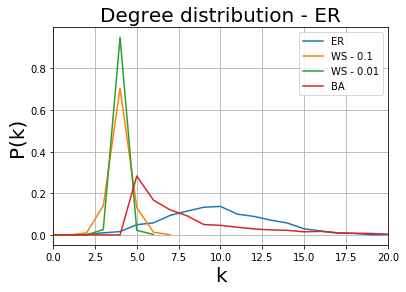

In [9]:
# Degree Distribution GER
N = 1000
av_degree = 10
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

ks, Pk = degree_distribution(GER)

plt.figure()
plt.plot(ks,Pk, label='ER')
plt.title("Degree distribution - ER", fontsize=20)


N= 1000
av_degree = 10
k = int(av_degree/2)
p = 0.1 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

ks, Pk = degree_distribution(GWS)

plt.plot(ks,Pk, label='WS - 0.1')

N= 1000
av_degree = 10
k = int(av_degree/2)
p = 0.01 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

ks, Pk = degree_distribution(GWS)

plt.plot(ks,Pk, label='WS - 0.01')


N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

ks, Pk = degree_distribution(GBA)

plt.plot(ks,Pk, label='BA')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlim(0,20)
plt.legend()
plt.grid(True)



No gráfico é clara que a distribuição dos graus para as redes WS são mais concentradas, possuindo um pico, já as redes ER e BA também possuem picos mas bem menores e são mais amplas. Sobre as medidas médias, essa distinção entre as redes continua ocorrendo, principalmente no grau médio, o que já era esperado, segundo momento e menor caminho, podendo ser uma consequência da primeira. 

# Exercício 2

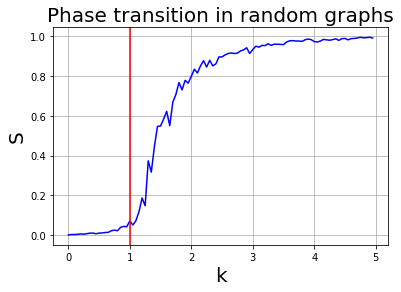

In [10]:
# Transition Curve
N = 1000
S = []
vk = []
for c in arange(0, 5, 0.05):
    p = c/(N-1)
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc=sorted(nx.connected_component_subgraphs(GER), key = len, reverse=True)
    G=Gcc[0]
    S.append(len(G)/N)
    vk.append(c)
plt.figure()
plt.plot(vk,S,'b', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in random graphs", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.show();


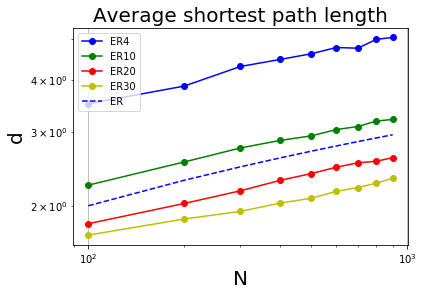

In [13]:
# Average Shortest Path
vd = []
vn = []
av_degree = 10
Nmax = 1000
k_app = []
list_k = [4,10,20,30]
# Dar um jeito de colocar o valor de k no label.
colors = ['b','g','r','y']
aux = 0
for k in list_k:
    vd = []
    vn = []
    for n in arange(100,Nmax, 100):
        p = k/(n-1)
        GER = nx.gnp_random_graph(n, p, seed=None, directed=False)
        Gcc=sorted(nx.connected_component_subgraphs(GER), key = len, reverse=True)
        G=Gcc[0]
        vd.append(nx.average_shortest_path_length(G))
        vn.append(n)
    plt.loglog(vn,vd,'-or',basex=10,basey=10, label = 'ER'+str(k), color = colors[aux])
    aux=aux+1

        
x = arange(100,Nmax, 100)
plt.loglog(x,log10(x),'--b', label='ER', basex=10,basey=10)
plt.xlabel("N", fontsize=20)
plt.ylabel("Av_Shortest", fontsize=20)
plt.title("Average shortest path length", fontsize=20)
plt.grid(True)
plt.legend()
plt.show();

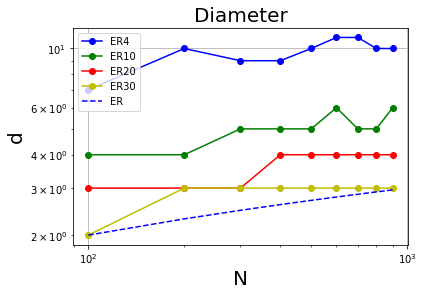

In [15]:
# Diameter
av_degree = 10
Nmax = 1000
k_app = []
list_k = [4,10,20,30]
# Dar um jeito de colocar o valor de k no label.
colors = ['b','g','r','y']
aux = 0
for k in list_k:
    d = []
    vn = []
    for n in arange(100,Nmax, 100):
        p = k/(n-1)
        GER = nx.gnp_random_graph(n, p, seed=None, directed=False)
        Gcc=sorted(nx.connected_component_subgraphs(GER), key = len, reverse=True)
        G=Gcc[0]
        d.append(nx.diameter(G))
        vn.append(n)
    plt.loglog(vn,d,'-or',basex=10,basey=10, label = 'ER'+str(k), color = colors[aux])
    aux=aux+1

        
x = arange(100,Nmax, 100)
plt.loglog(x,log10(x),'--b', label='ER', basex=10,basey=10)
plt.xlabel("N", fontsize=20)
plt.ylabel("Diameter", fontsize=20)
plt.title("Diameter", fontsize=20)
plt.grid(True)
plt.legend()
plt.show();

# Exercício 3

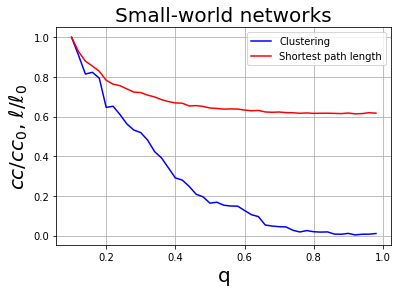

In [16]:
N = 1000
av_degree = 10
k = int(av_degree/2)
vcc = []
vl = []
vq = []
for q in arange(0.1, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    cc = nx.average_clustering(G)
    vcc.append(cc)
    l = nx.average_shortest_path_length(G)
    vl.append(l)
    vq.append(q)
plt.figure()
plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Clustering')
plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
plt.xlabel("q", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

No handles with labels found to put in legend.


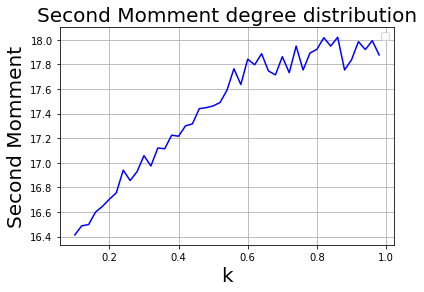

In [22]:
N = 1000
av_degree = 10
k = int(av_degree/2)
plt.figure()
aux = 0
ks =[]
Q = []
for q in arange(0.1, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    k2= momment_of_degree_distribution(G,2)
    ks.append(k2)
    aux = aux + 1
    Q.append(q)
plt.plot(Q,ks,'-', color = 'b')
plt.xlabel("k", fontsize=20)
plt.ylabel("Second Momment", fontsize=20)
plt.title("Second Momment degree distribution", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

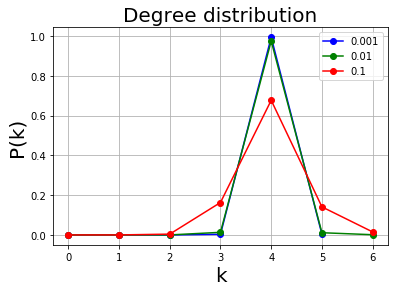

In [67]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
q_list=[0.001,0.01,0.1]
for q in q_list: #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    ks, Pk = degree_distribution(G)
    plt.plot(ks,Pk,'o-', color = colors[aux], label = str(q))
    aux = aux + 1
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

In [6]:
p = [0.001, 0.01, 0.1, 1.]
av_degree = 8
k = int(av_degree/2)
av_short = []
for q in p:
    print(q, end = '\r') # monitor progress
    aux = []
    for N in np.arange(5, 600, 25):
        G = nx.watts_strogatz_graph(N, k, q, seed=None)
        aux.append(nx.average_shortest_path_length(G))
    av_short.append(aux)

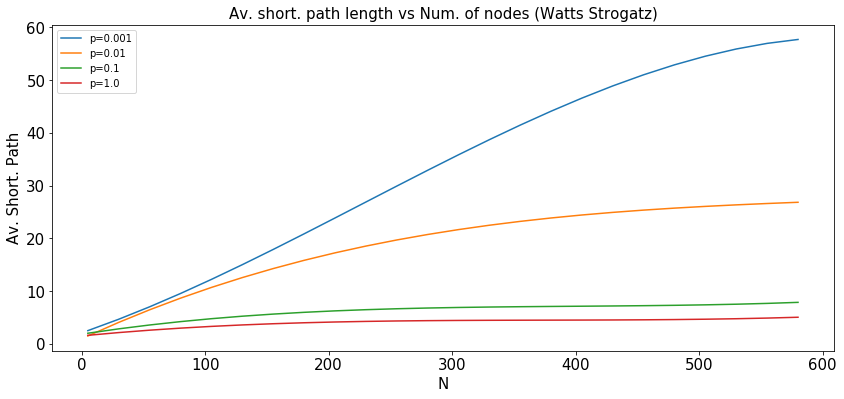

In [7]:
plt.figure(figsize = (14,6))
plt.title('Av. short. path length vs Num. of nodes (Watts Strogatz)', fontsize = 15)    
for var, q in zip(av_short, p):
    # Fit with polinomial curve
    pol = np.poly1d(np.polyfit(np.arange(5, 600, 25), var, 3))
    y = pol(np.arange(5, 600, 25))
    plt.plot(np.arange(5, 600, 25), y, label = 'p='+str(q))
plt.xlabel("N", fontsize=15)
plt.ylabel("Av. Short. Path", fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

# Exercício 4

In [90]:
measures = ['network','nodes', 'average_degree', 'second_momment','av_shortest_path','av_cluster_coef','transitivity','assort_coef']

In [96]:
# Gerando redes BA

N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
results_GBA = calcula_medidas(GBA)

n_nodes_BA=results_GBA[0]
av_degree_BA=results_GBA[1]
sec_moment_BA=results_GBA[2]
av_short_BA=results_GBA[3]
av_clust_BA=results_GBA[4]
tran_BA=results_GBA[5]
ac_BA=results_GBA[6]




measures_GBA = pd.Series({measures[0]:'GBA',measures[1]: n_nodes_BA,measures[2]:av_degree_BA, \
                       measures[3]:sec_moment_BA,measures[4]:av_short_BA, measures[5]:av_clust_BA,\
                       measures[6]:tran_BA,measures[7]:ac_BA})


print(measures_GBA)

network                   GBA
nodes                    1000
average_degree           9.95
second_momment        200.656
av_shortest_path       2.9804
av_cluster_coef     0.0394855
transitivity        0.0299519
assort_coef        -0.0609943
dtype: object


In [98]:
def calcula_medidas_multigraph(G):
    # Number of nodes
    number_nodes = len(G)
    
    # Average Degree
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    md = mean(vk)
    
    # Second momment
    k2 = momment_of_degree_distribution(G,2)
    
    # Average Shortest Path
    if nx.is_connected(G) == True:
        l = nx.average_shortest_path_length(G)
    else:
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G_1=Gcc[0]
        print('We will use only the largest component')
        l = nx.average_shortest_path_length(G_1)
    
#     # Average Clustering
#     avc = nx.average_clustering(G)
    
#     # Transitivity
#     CC = (nx.transitivity(G)) 
    
    # Assortativity Coefficient
    r=nx.degree_assortativity_coefficient(G)

 #   results  = [number_nodes, md, k2, l, avc, CC, r]
    results  = [number_nodes, md, k2, l, r]

    return results


In [99]:
# para o tipo multigraph não tem clustering coef e nem transitivity
# Gerando redes CM

from random import *
N = 1000
a = 2
seq = np.random.zipf(a, N) #Zipf distribution

if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq))
    seq[pos] = seq[pos]+ 1
GCM=nx.configuration_model(seq)
#get the largest component
Gcc=sorted(nx.connected_component_subgraphs(GCM), key = len, reverse=True)
G=Gcc[0]

results_GCM = calcula_medidas_multigraph(G)

n_nodes_CM=(results_GCM[0])
av_degree_CM=(results_GCM[1])
sec_moment_CM=(results_GCM[2])
av_short_CM=(results_GCM[3])
ac_CM=(results_GCM[4])




measures_GCM = pd.Series({measures[0]:'GCM',measures[1]: n_nodes_CM,measures[2]:av_degree_CM, \
                       measures[3]:sec_moment_CM,measures[4]:av_short_CM, measures[5]:0,\
                       measures[6]:0, measures[7]:ac_CM})

print(measures_GCM)

network                  GCM
nodes                    953
average_degree       5.72298
second_momment       4993.71
av_shortest_path     2.87362
av_cluster_coef            0
transitivity               0
assort_coef        -0.123905
dtype: object


In [100]:
df = pd.DataFrame([measures_GBA, measures_GCM])
df.head()

,network,nodes,average_degree,second_momment,av_shortest_path,av_cluster_coef,transitivity,assort_coef
0,GBA,1000,9.95000,200.656000,2.980396,0.039485,0.029952,-0.060994
1,GCM,953,5.72298,4993.714586,2.873619,0.000000,0.000000,-0.123905


In [9]:
# Letra C
import igraph as g

def pega_rede_BA(N,m,alpha):
    # Barabasi Albert with alpha param
    BA = g.Graph.Barabasi(n=N, m=m, power = alpha)

    # Convert igraph to networkx Graph
    G = nx.Graph()

    for e in BA.es: # collect edges
        G.add_edge(*e.tuple)
    return G

Text(0, 0.5, 'Kmax')

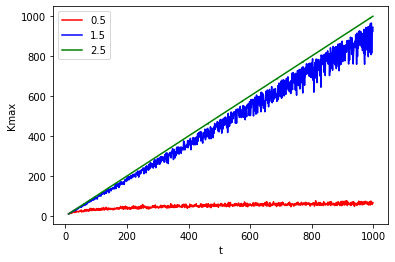

In [41]:
av_degree = 8
alphas = [0.5,1.5,2.5]
colors = ['r','b','g']
aux = 0
count = 1
for alpha in alphas:
    kmax = []
    t = []
    for n in np.arange(10,1000,1):
        n = n
        m = int(av_degree/2)
        G = pega_rede_BA(n,m,alpha)
        kmax.append(np.max(list(dict(G.degree()).values())))
        t.append(n)
    plt.plot(t, kmax, label = str(alpha), color = colors[aux])
    aux = aux+1
plt.legend()
plt.xlabel('t')
plt.ylabel('Kmax')

In [60]:
# Letra D
N = 1000
m = int(av_degree/2)

alpha = 0.5
G05 = pega_rede_BA(N,m,alpha)
    
results_G05 = calcula_medidas(G05)

n_nodes_G05 = (results_G05[0])
av_degree_G05 = (results_G05[1])
sec_moment_G05=(results_G05[2])
av_short_G05=(results_G05[3])
av_clust_G05=(results_G05[4])
tran_G05=(results_G05[5])
ac_G05=(results_G05[6])
    
measures_G05 = pd.Series({measures[0]: 'Alpha 0.5',measures[1]:(n_nodes_G05),measures[2]:(av_degree_G05),\
                       measures[3]:(sec_moment_G05),measures[4]:(av_short_G05), measures[5]:(av_clust_G05),
                       measures[6]:(tran_G05),measures[7]:(ac_G05)})

In [61]:
alpha_1 = 1.5
G15 = pega_rede_BA(N,m,alpha_1)
    
results_G15 = calcula_medidas(G15)

n_nodes_G15 = (results_G15[0])
av_degree_G15 = (results_G15[1])
sec_moment_G15=(results_G15[2])
av_short_G15=(results_G15[3])
av_clust_G15=(results_G15[4])
tran_G15=(results_G15[5])
ac_G15=(results_G15[6])
    
measures_G15 = pd.Series({measures[0]: 'Alpha 1.5',measures[1]:(n_nodes_G15),measures[2]:(av_degree_G15),\
                       measures[3]:(sec_moment_G15),measures[4]:(av_short_G15), measures[5]:(av_clust_G15),
                       measures[6]:(tran_G15),measures[7]:(ac_G15)})

In [62]:
alpha_2 = 2.5
G25 = pega_rede_BA(N,m,alpha_2)
    
results_G25 = calcula_medidas(G25)

n_nodes_G25 = (results_G25[0])
av_degree_G25 = (results_G25[1])
sec_moment_G25=(results_G25[2])
av_short_G25=(results_G25[3])
av_clust_G25=(results_G25[4])
tran_G25=(results_G25[5])
ac_G25=(results_G25[6])
    
measures_G25 = pd.Series({measures[0]: 'Alpha 2.5',measures[1]:(n_nodes_G25),measures[2]:(av_degree_G25),\
                       measures[3]:(sec_moment_G25),measures[4]:(av_short_G25), measures[5]:(av_clust_G25),
                       measures[6]:(tran_G25),measures[7]:(ac_G25)})


In [63]:
df = pd.DataFrame([measures_G05, measures_G15, measures_G25])
df.head()

,stats,nodes,average_degree,second_momment,av_shortest_path,av_cluster_coef,transitivity,assort_coef
0,Alpha 0.5,1000,7.98,110.950,3.321147,0.019558,0.024357,0.044169
1,Alpha 1.5,1000,7.98,2977.260,1.992723,0.946510,0.011764,-0.815013
2,Alpha 2.5,1000,7.98,3999.996,1.992012,0.995624,0.008988,-0.994993
